<a href="https://colab.research.google.com/github/rizkyfransisca/Tugas-Akhir-Associate-Data-Scientist_credit-card-acceptance-classification/blob/main/CreditCardAcceptanceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Eksplorasi Data & Persiapan Data

Melakukan ekplorasi data dan persiapan data untuk mengklasifikasi kelayakan penerimaan kartu kredit berdasarkan profil dari
nasabah bank

<br>Kelompok 1
<br>ITB-01
<br>Anggota:
  - Whinar Kukuh Rizky Ardana
  - Kadek Rizky Fransisca Putra
  - Maulana Farrel Ceskicevas


##Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# plt.style.use('default')
sns.set_theme()

## Eksplorasi data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rizkyfransisca/Tugas-Akhir-Associate-Data-Scientist_credit-card-acceptance-classification/main/creditcardmarketing-bbm.csv")

Menampilkan 5 data pertama dari DataFrame

In [ ]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


Menampilkan 5 data terakhir dari DataFrame

In [ ]:
df.tail()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0
17999,18000,No,Cash Back,Letter,Low,2,No,Medium,2,1,3,No,1056.00,265.0,1378.0,1978.0,603.0


Menampilkan 5 sample data yang dipilih secara acak dari DataFrame

In [ ]:
df.sample(5)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
8940,8941,No,Cash Back,Letter,Low,1,Yes,Medium,2,1,5,Yes,1332.25,1646.0,1321.0,1394.0,968.0
12781,12782,No,Air Miles,Postcard,High,1,No,Medium,2,2,3,Yes,298.50,287.0,137.0,405.0,365.0
10711,10712,No,Cash Back,Postcard,High,1,No,Low,3,1,2,Yes,593.50,614.0,666.0,538.0,556.0
15409,15410,No,Air Miles,Postcard,Low,1,No,Medium,1,1,3,Yes,883.00,170.0,1364.0,1418.0,580.0
2167,2168,No,Cash Back,Letter,High,1,No,Medium,2,1,3,Yes,1190.25,827.0,1455.0,1959.0,520.0


Menampilkan nilai atau value yang ada pada setiap feature, untuk semua feature yang ada pada DataFrame

In [ ]:
for col in df.columns:
  print('-'*30 + " " + col +  " " +  '-'*30)
  print()
  print(df[col].unique())
  print()

------------------------------ Customer Number ------------------------------

[    1     2     3 ... 17998 17999 18000]

------------------------------ Offer Accepted ------------------------------

['No' 'Yes']

------------------------------ Reward ------------------------------

['Air Miles' 'Cash Back' 'Points']

------------------------------ Mailer Type ------------------------------

['Letter' 'Postcard']

------------------------------ Income Level ------------------------------

['High' 'Medium' 'Low']

------------------------------ # Bank Accounts Open ------------------------------

[1 2 3]

------------------------------ Overdraft Protection ------------------------------

['No' 'Yes']

------------------------------ Credit Rating ------------------------------

['High' 'Medium' 'Low']

------------------------------ # Credit Cards Held ------------------------------

[2 1 3 4]

------------------------------ # Homes Owned ------------------------------

[1 2 3]

--------

Menampilkan missing value yang ada pada setiap kolom, untuk semua kolom yang ada pada DataFrame.

In [ ]:
df.isna().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [ ]:
avg = df[df['Average Balance'].isna()].index
q1 = df[df['Q1 Balance'].isna()].index
q2 = df[df['Q2 Balance'].isna()].index
q3 = df[df['Q3 Balance'].isna()].index
q4 = df[df['Q4 Balance'].isna()].index

pd.DataFrame({
    'avg':avg,
    'q1':q1,
    'q2':q2,
    'q3':q3,
    'q4':q4
}).duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

Pada data ini, ditemukan Missing value sebanyak 24 data, dan missing value ini hanya muncul pada kolom balance, dan muncul di baris yang sama. sehingga pada kasus ini missing value akan kita hapus karena setiap kolom mempunyai missing value pada baris yang sama. 

Text(0.5, 1.0, 'Proportions of Accepted Offer Customers')

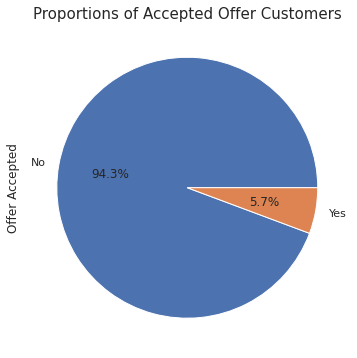

In [ ]:
plt.figure(figsize=(8,6))
df['Offer Accepted'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f%%")
plt.title('Proportions of Accepted Offer Customers', fontsize=15)

Dari pie chart diatas, ditemukan bahwa dataset ini memiliki label yang tidak seimbang, hampir semua penawaran atau offer tidak diterima, dan penawaran atau offer yang diterima hanya 5,7% dari data.

Menampilkan nilai statistika deskriptif untuk setiap kolom yang memiliki tipe data numerik.

In [ ]:
df.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


Melakukan pengecekan outliers pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" menggunakan boxplot

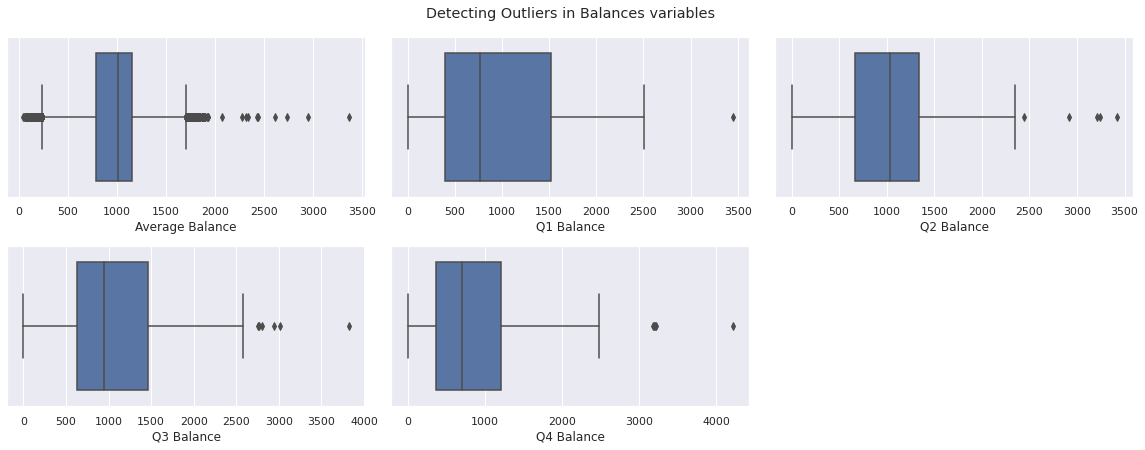

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(16,6))
sns.boxplot(df['Average Balance'], ax=ax[0,0])
sns.boxplot(df['Q1 Balance'], ax=ax[0,1])
sns.boxplot(df['Q2 Balance'], ax=ax[0,2])
sns.boxplot(df['Q3 Balance'], ax=ax[1,0])
sns.boxplot(df['Q4 Balance'], ax=ax[1,1])
ax[1][2].set_visible(False)

plt.suptitle('Detecting Outliers in Balances variables', y=1.04)

plt.tight_layout()

Dengan menggunakan Boxplot, terdapat outliers/data pencilan pada kolom balance (Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance). data pencilan terbanyak ada pada kolom Average Balance yang muncul di atas dan bawah treshold,

Melakukan pengecekan, apakah setiap nilai pada kolom "Custumer Number" merupakan nilai yang unik.

In [ ]:
df['Customer Number'].is_unique

True

Karena kolom "Customer Number" menghasilkan atau mempunyai nilai yang unik, maka kami menggunakan nilai pada kolom "Customer Number" sebagai indeks

In [ ]:
df = df.set_index('Customer Number')
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


Mengecek dan menampilkan duplicated data yang ada pada DataFrame

In [ ]:
df.duplicated().sum()

0

## Data Preprocessing

### Handling Missing Value

Dalam menghandle missing value yang ditemukan pada dataset, kami men-drop atau membuang baris yang terdapat missing value. Kami menggunakan metode tersebut karena semua missing value yang ditemukan pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" berada pada baris yang sama.

In [ ]:
print('Dimensi data awal : ',df.shape)

df.dropna(inplace=True)

print('Dimensi data setelah handling missing value : ',df.shape)

Dimensi data awal :  (18000, 16)
Dimensi data setelah handling missing value :  (17976, 16)


### Handling Outliers

Menampilkan 5 data pertama dari DataFrame

In [ ]:
df.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


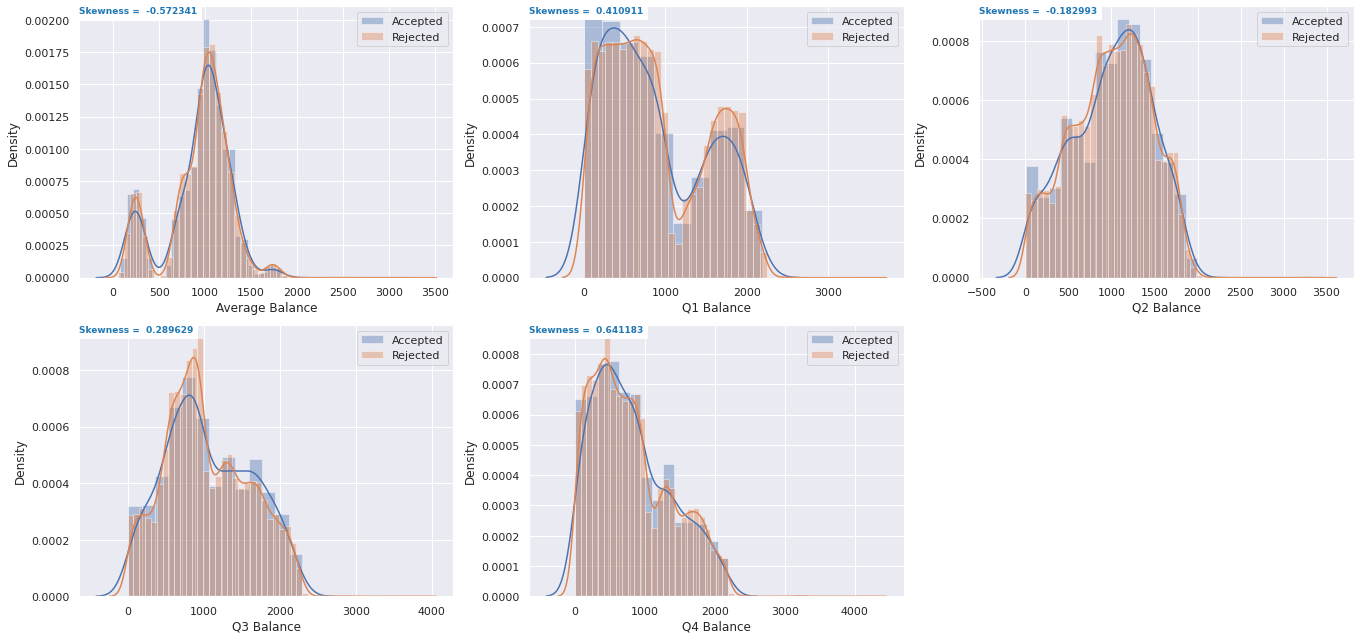

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(19,9))
df_acc = df[df['Offer Accepted'] == 'Yes']
df_reject = df[df['Offer Accepted'] == 'No']


sns.distplot(df_acc['Average Balance'], ax=ax[0,0], label='Accepted')
sns.distplot(df_reject['Average Balance'], ax=ax[0,0], label='Rejected')
ax[0,0].legend()
ax[0,0].text(x=0, y=1, transform=ax[0,0].transAxes, s="Skewness =  %f" % df['Average Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')


sns.distplot(df_acc['Q1 Balance'], ax=ax[0,1], label='Accepted')
sns.distplot(df_reject['Q1 Balance'], ax=ax[0,1], label='Rejected')
ax[0,1].legend()
ax[0,1].text(x=0, y=1, transform=ax[0,1].transAxes, s="Skewness =  %f" % df['Q1 Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')

sns.distplot(df_acc['Q2 Balance'], ax=ax[0,2], label='Accepted')
sns.distplot(df_reject['Q2 Balance'], ax=ax[0,2], label='Rejected')
ax[0,2].legend()
ax[0,2].text(x=0, y=1, transform=ax[0,2].transAxes, s="Skewness =  %f" % df['Q2 Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')


sns.distplot(df_acc['Q3 Balance'], ax=ax[1,0], label='Accepted')
sns.distplot(df_reject['Q3 Balance'], ax=ax[1,0], label='Rejected')
ax[1,0].legend()
ax[1,0].text(x=0, y=1, transform=ax[1,0].transAxes, s="Skewness =  %f" % df['Q3 Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')


sns.distplot(df_acc['Q4 Balance'], ax=ax[1,1], label='Accepted')
sns.distplot(df_reject['Q4 Balance'], ax=ax[1,1], label='Rejected')
ax[1,1].legend()
ax[1,1].text(x=0, y=1, transform=ax[1,1].transAxes, s="Skewness =  %f" % df['Q4 Balance'].skew(), fontweight=600,fontsize=9, verticalalignment='top',horizontalalignment='left', backgroundcolor='white',color='tab:blue')


ax[1][2].set_visible(False)


plt.tight_layout()

Kami memeriksa distribusi dari setiap kolom balance, tidak terdapat kolom yang sepenuhnya berdistribusi normal. terutama kolom Q4 Balance yang cenderung miring ke kanan dengan nilai skewness 0.6

Kami melakukan treatment atau penghilangan nilai outliers dengan cara mengubah nilai outliers yang ditemukan pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" dengan nilai batas maksimum observasi dan nilai batas minimum observasi pada setiap kolom. Kami menggunakan metode tersebut karena outliers pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" merupakan data yang valid atau tidak berasal dari kesalahan input atau human error

In [ ]:
outliers_columns = ["Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", "Q4 Balance"]
for column in outliers_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  df.loc[df[column] < (Q1 - 1.5 * IQR), column] = Q1 - 1.5 * IQR
  df.loc[df[column] > (Q3 + 1.5 * IQR), column] = Q3 + 1.5 * IQR

Melakukan pengecekan ulang nilai outliers pada kolom "Average Balance", "Q1 Balance", "Q2 Balance", "Q3 Balance", dan "Q4 Balance" setelah dilakukan treatment outliers atau penghapusan nilai outliers.

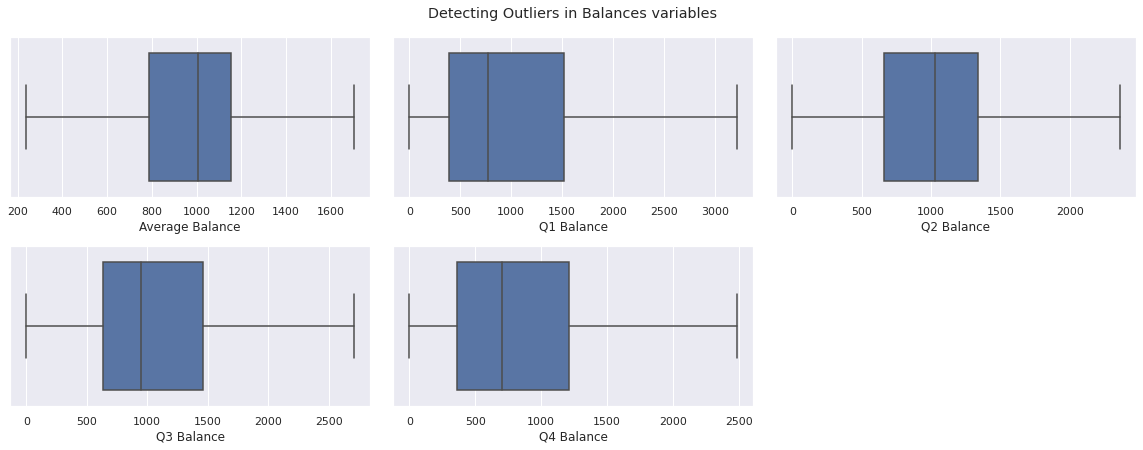

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(16,6))
sns.boxplot(df['Average Balance'], ax=ax[0,0])
sns.boxplot(df['Q1 Balance'], ax=ax[0,1])
sns.boxplot(df['Q2 Balance'], ax=ax[0,2])
sns.boxplot(df['Q3 Balance'], ax=ax[1,0])
sns.boxplot(df['Q4 Balance'], ax=ax[1,1])
ax[1][2].set_visible(False)

plt.suptitle('Detecting Outliers in Balances variables', y=1.04)

plt.tight_layout()

### Encoding Categorical Variables

In [ ]:
def level_encoder(data):
    if data == 'High':
        return 2
    if data == 'Medium':
        return 1
    else:
        return 0

df['Income Level'] = df['Income Level'].apply(lambda x : level_encoder(x) )
df['Credit Rating'] = df['Credit Rating'].apply(lambda x : level_encoder(x) )

Pada tahap ini kami akan melakukan encoding ordinal data pada kolom Income Level dan Credit Rating, encoding dilakukan sesuai tingkatan data pada kolom tersebut.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Offer Accepted'] = le.fit_transform(df['Offer Accepted'])
df['Offer Accepted'].value_counts(normalize=True)

0    0.943202
1    0.056798
Name: Offer Accepted, dtype: float64

Pada tahap ini kami melakukan encoding untuk label / data target karena masih  berbentuk kategorikal data

In [ ]:
%pip install feature-engine
from feature_engine.encoding import OneHotEncoder

In [ ]:
enc = OneHotEncoder()
df = enc.fit_transform(df)

df.head()

,Offer Accepted,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Overdraft Protection_No,Overdraft Protection_Yes,Own Your Home_No,Own Your Home_Yes
Customer Number,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,2,2,1,4,1160.750,1669.0,877.0,1095.0,1002.0,1,0,0,1,0,1,0,1,0
2,0,1,1,1,2,2,5,238.875,39.0,106.0,78.0,366.0,1,0,0,1,0,1,0,0,1
3,0,2,2,1,2,1,2,276.500,367.0,352.0,145.0,242.0,1,0,0,0,1,1,0,0,1
4,0,1,2,2,1,1,4,1219.000,1578.0,1760.0,1119.0,419.0,1,0,0,1,0,1,0,1,0
5,0,1,1,1,2,1,6,1211.000,2140.0,1357.0,982.0,365.0,1,0,0,1,0,1,0,0,1


Kemudian di tahap ini kami melakukan encoding untuk data kategorikal yang berjenis nominal menggunakan fungsi OneHotEncoder.

### Scaling

Menampilkan 5 data pertama dari DataFrame

In [ ]:
df.head()

,Offer Accepted,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Overdraft Protection_No,Overdraft Protection_Yes,Own Your Home_No,Own Your Home_Yes
Customer Number,,,,,,,,,,,,,,,,,,,,,
1,0,2,1,2,2,1,4,1160.750,1669.0,877.0,1095.0,1002.0,1,0,0,1,0,1,0,1,0
2,0,1,1,1,2,2,5,238.875,39.0,106.0,78.0,366.0,1,0,0,1,0,1,0,0,1
3,0,2,2,1,2,1,2,276.500,367.0,352.0,145.0,242.0,1,0,0,0,1,1,0,0,1
4,0,1,2,2,1,1,4,1219.000,1578.0,1760.0,1119.0,419.0,1,0,0,1,0,1,0,1,0
5,0,1,1,1,2,1,6,1211.000,2140.0,1357.0,982.0,365.0,1,0,0,1,0,1,0,0,1


In [ ]:
X = df.drop(columns='Offer Accepted', axis=1)
y = df['Offer Accepted']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

Sebelum dilakukan standardisasi, data harus di split terlebih dahulu menjadi Train dan Test data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns= X_train.columns[:11].values

scaler.fit(X_train[columns])

X_train[columns] = scaler.transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

Untuk Standardisasi, kami menggunakan MinMaxScaler karena data yang kita gunakan tidak sepenuhnya berdistribusi normal. kemudian fungsi scaler kita fit ke data train, kemudian kita transormasikan scaler ke data train dan juga test agar data test juga di transformasi sesuai dengan range data train.

In [ ]:
X_train.head()

,Income Level,# Bank Accounts Open,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Overdraft Protection_No,Overdraft Protection_Yes,Own Your Home_No,Own Your Home_Yes
Customer Number,,,,,,,,,,,,,,,,,,,,
16122,0.0,0.0,1.0,0.666667,0.0,0.375,0.639525,0.643871,0.499682,0.435537,0.108228,0,1,0,0,1,1,0,1,0
8930,1.0,0.0,0.0,0.000000,0.0,0.500,0.388158,0.262341,0.259801,0.294422,0.391068,0,1,0,1,0,1,0,1,0
16163,0.5,0.5,0.5,0.333333,0.0,0.250,0.563141,0.191076,0.302606,0.447359,0.687990,1,0,0,1,0,0,1,0,1
16357,0.5,0.5,1.0,0.000000,0.0,0.250,0.331425,0.271988,0.273363,0.256003,0.273989,1,0,0,1,0,1,0,0,1
16751,0.5,0.0,1.0,0.333333,0.0,0.250,0.408835,0.073754,0.428057,0.439232,0.366124,1,0,0,1,0,1,0,0,1


Data sudah di transformasi

### Handling Imbalance Data

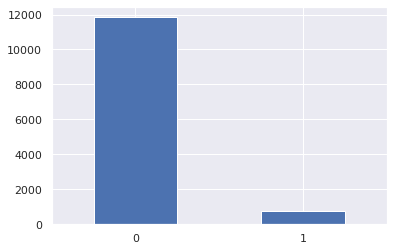

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Data yang kita gunakan memiliki label yang tidak imbang, dimana jika dilihat dari bar chart diatas perbandingan kelas sangat jauh. sehingga perlu di seimbangkan jumlahnya agar data tidak cenderung berat di salah satu kelas saja.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

Untuk mengatasi imbalance class, kami menggunakan fungsi SMOTE untuk melakukan upsampling.

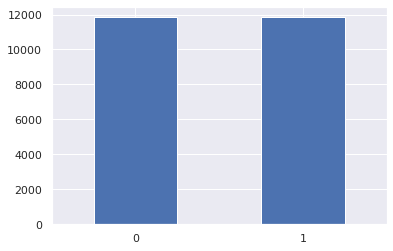

In [ ]:
y_smote.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

Setelah dilakukan upsampling, jumlah data class sudah sama sehingga sudah siap untuk dilakukan modelling.

### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Memasukan atribut ke variabel X dan memasukan kelas yaitu Offer Accepted ke variabel y yang berutujuan memisahkan kelas dengan atribut lainnya

In [ ]:
#Atribut
X = df.iloc[:,1:]
#Class
y = df.iloc[:,0]

Memanggil functuin SelectKBEst dengan score function chi2 dan k sebanyak 20

In [ ]:
bestfeature = SelectKBest(score_func=chi2, k=20)
fit = bestfeature.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolums = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolums, dfscores],axis=1)
featureScores.columns = ['Field', 'Score']
print(featureScores.nlargest(20,'Score'))

                       Field        Score
7                 Q1 Balance  2074.095497
9                 Q3 Balance   375.000417
2              Credit Rating   279.618079
14        Mailer Type_Letter    86.319037
15      Mailer Type_Postcard    83.559550
12          Reward_Cash Back    56.330296
0               Income Level    52.679210
11          Reward_Air Miles    44.113276
6            Average Balance    20.495458
10                Q4 Balance     3.315793
5             Household Size     1.053845
13             Reward_Points     0.704098
8                 Q2 Balance     0.162391
17  Overdraft Protection_Yes     0.111125
3        # Credit Cards Held     0.022337
16   Overdraft Protection_No     0.019436
1       # Bank Accounts Open     0.007948
4              # Homes Owned     0.000585
18          Own Your Home_No     0.000029
19         Own Your Home_Yes     0.000016


Setelah dilakukan SeleckKBest ditemukan bahwa Q1 Balance, Q3 Balance, Credit Rating, Mailer Type_Letter, Mailer Type_Postcard, Reward_Cash Back, Income Level, Reward_Air Miles, dan Average Balance mendapatkan nilai yang cukup tinggi sebagai atribut/fitur untuk target kelas Offer Accepted  

## Seleksi Fitur

### ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

[0.03644628 0.03678263 0.0438533  0.06544828 0.03274899 0.08550744
 0.11941213 0.12635695 0.12561289 0.12497757 0.12579617 0.00697275
 0.00620374 0.00634444 0.00629808 0.00684116 0.00912469 0.00909868
 0.01323054 0.0129433 ]
Q1 Balance                  0.126357
Q4 Balance                  0.125796
Q2 Balance                  0.125613
Q3 Balance                  0.124978
Average Balance             0.119412
Household Size              0.085507
# Credit Cards Held         0.065448
Credit Rating               0.043853
# Bank Accounts Open        0.036783
Income Level                0.036446
# Homes Owned               0.032749
Own Your Home_No            0.013231
Own Your Home_Yes           0.012943
Overdraft Protection_No     0.009125
Overdraft Protection_Yes    0.009099
Reward_Air Miles            0.006973
Mailer Type_Postcard        0.006841
Reward_Points               0.006344
Mailer Type_Letter          0.006298
Reward_Cash Back            0.006204
dtype: float64


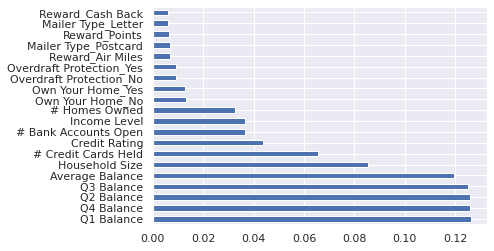

In [ ]:
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)
print(feat_importance)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

Setelah dilakukan ExtraTreesClassifier ditemukan bahwa Q1 Balance, Q4 Balance, Q2 Balance, Q3 Balance, Average Balance, Household Size, Credit Cards, Credit Rating, Bank Accounts Open, Income Level, dan Homes Owned mendapatkan nilai yang cukup tinggi sebagai atribut/fitur untuk target kelas Offer Accepted  

### Korelasi

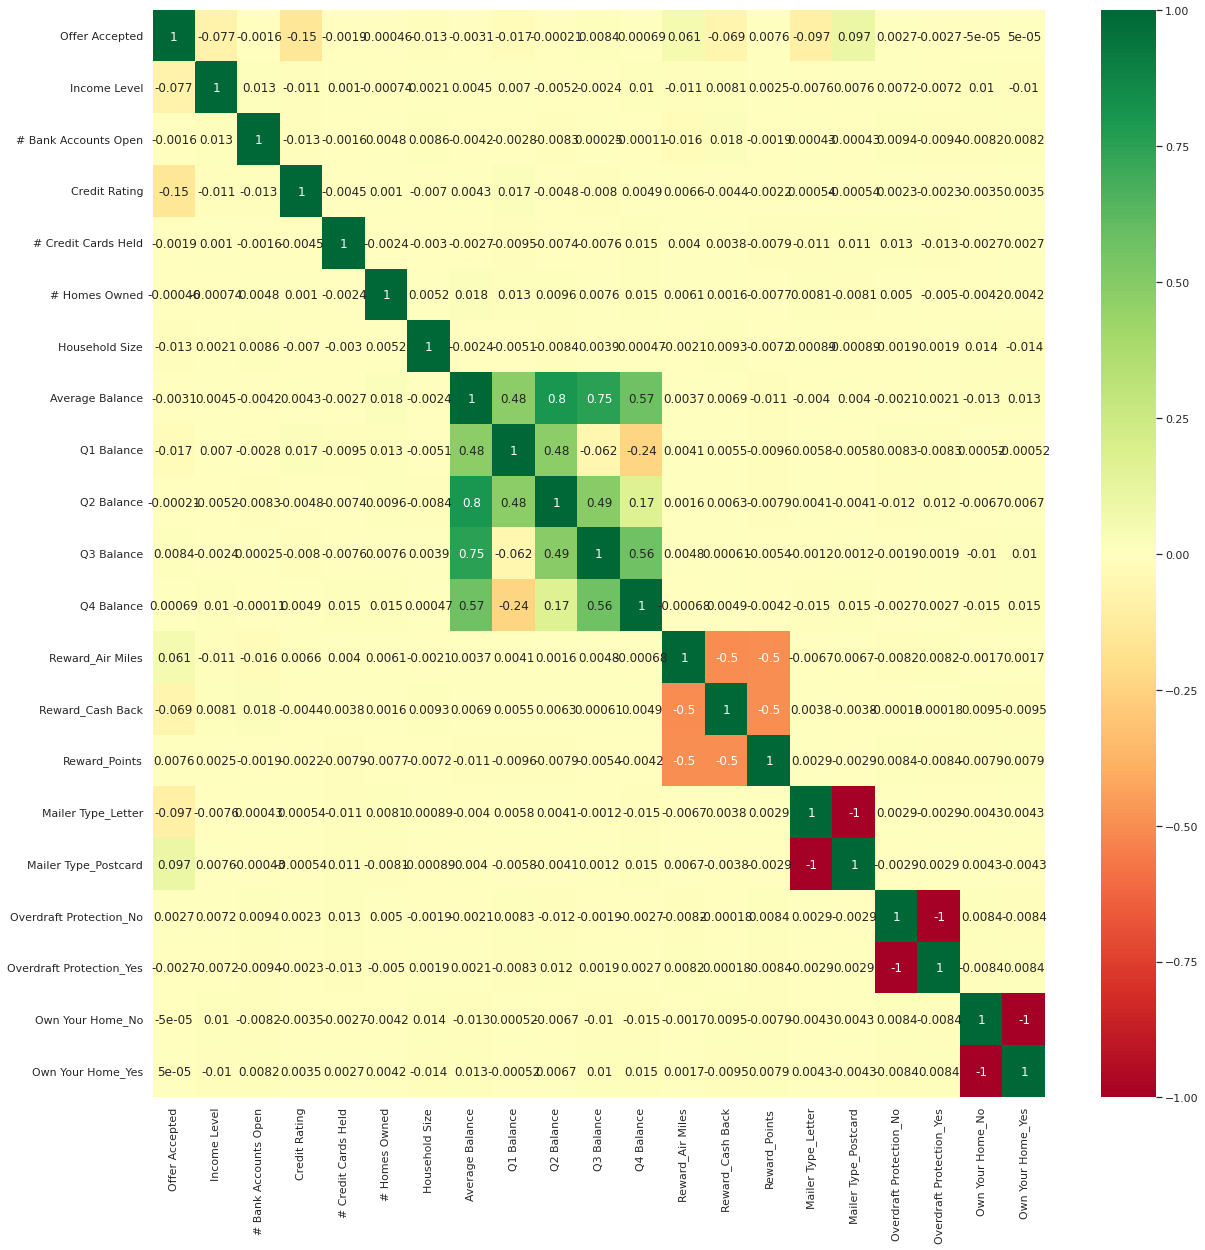

In [ ]:
# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heatmap
h = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Dapat dilihat pada baris teratas yaitu Offer Accepted, korelasi antara Offer Accepted dengan fitur lain dimana ada relasi dengan Credit Rating dan diikuti oleh var Income Level, Mailer Type_Letter, Mailer Type_Postcard, Reward_Cash Back, dan Q4 Balance.